In [5]:
############################################################################################ REDef ALL Implementation ##########################################################################################################
### ###################################################
#       Coded by : Rose (Pratama Azmi A)
#       Date : 19/02/2023
##################################################
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from typing import List
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Training information
VALIDATION_SIZE : float = 0.2
MIN_ACC : float= 0.86
# Embedding and Padding information
MAX_WORDS : int = 1000
OOV_TOKEN : str = "<OOV>"
MAX_LEN : int = 25
EMBEDDING_DIMS : int = 4

PADDING_TYPE : str = "post"
TRUNC_TYPE  : str = "post"


class Callback(keras.callbacks.Callback):
    
    
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch : %s acc %s val_Loss %s val_acc %s" %(epoch,logs.get("categorical_accuracy"),logs.get("val_loss"), logs.get("val_categorical_accuracy")))
        if(logs.get("val_categorical_accuracy") > MIN_ACC and logs.get("categorical_accuracy") >MIN_ACC) :
            print("Stopping Training ! Validation & train reach 0.86")
            self.model.stop_training = True

df : pd.DataFrame = pd.read_csv("EcoPreprocessed.csv")
## Convert to one hot encoding 

category_one_hot : pd.DataFrame = pd.get_dummies(df["division"])
df_oneHot = pd.concat([df, category_one_hot], axis=1)
df_oneHot.drop("division",axis=1,inplace=True)
X : np.array = df_oneHot["review"].values
Y : np.array = df_oneHot[["negative","neutral","positive"]].values


## Split the dataset and then go to Tokenizing & Padding
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=VALIDATION_SIZE)

tokenizer : Tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token=OOV_TOKEN)

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

sequence_train : List[List[int]] = tokenizer.texts_to_sequences(x_train)
sequence_test : List[List[int]] = tokenizer.texts_to_sequences(x_test)

padded_sequence_train : List[List[int]] = pad_sequences(sequence_train, maxlen=MAX_LEN,
                                           padding=PADDING_TYPE, truncating=TRUNC_TYPE)

padded_sequence_test : List[List[int]] = pad_sequences(sequence_test, maxlen=MAX_LEN,
                                           padding=PADDING_TYPE, truncating=TRUNC_TYPE)
## PAdding it so its at same resolution
model : tf.keras.Sequential = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIMS),
    tf.keras.layers.LSTM(64, dropout=0.3),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

callbacksA = Callback()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=[
                    tf.keras.metrics.CategoricalAccuracy()
              ])
#### Modelling and Also Compiling
print("training begin")
history = model.fit(padded_sequence_train, y_train, validation_data=(padded_sequence_test, y_test), batch_size=128, verbose=0,epochs=100,callbacks=[callbacksA])

training begin
Epoch : 0 acc 0.7254361510276794 val_Loss 0.7510358691215515 val_acc 0.7576499581336975
Epoch : 1 acc 0.7490051984786987 val_Loss 0.7264921069145203 val_acc 0.7576499581336975
Epoch : 2 acc 0.7490051984786987 val_Loss 0.7045044302940369 val_acc 0.7576499581336975
Epoch : 3 acc 0.7490051984786987 val_Loss 0.5061216950416565 val_acc 0.7576499581336975
Epoch : 4 acc 0.7793082594871521 val_Loss 0.45726752281188965 val_acc 0.7992656230926514
Epoch : 5 acc 0.8178757429122925 val_Loss 0.42897722125053406 val_acc 0.8139534592628479
Epoch : 6 acc 0.8218548893928528 val_Loss 0.40857070684432983 val_acc 0.8286413550376892
Epoch : 7 acc 0.839302122592926 val_Loss 0.41861459612846375 val_acc 0.8151775002479553
Epoch : 8 acc 0.8579736948013306 val_Loss 0.4007052779197693 val_acc 0.8372092843055725
Epoch : 9 acc 0.8717477917671204 val_Loss 0.3991217315196991 val_acc 0.8445532321929932
Epoch : 10 acc 0.8827670812606812 val_Loss 0.3938676714897156 val_acc 0.8506731986999512
Epoch : 11 ac

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


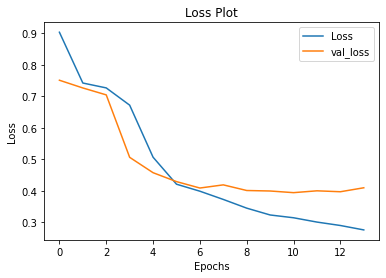

In [6]:
print(history.history.keys())
def plot_loss(history : pd.DataFrame):
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.title("Loss Plot")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Loss","val_loss"])
    plt.show()

def plot_accuracy(history:pd.DataFrame):
    plt.plot(history["categorical_accuracy"])
    plt.plot(history["val_categorical_accuracy"])
    plt.title("accuracy Plot")
    plt.xlabel("Epochs")
    plt.ylabel("ACC")
    plt.show()


plot_loss(history.history)

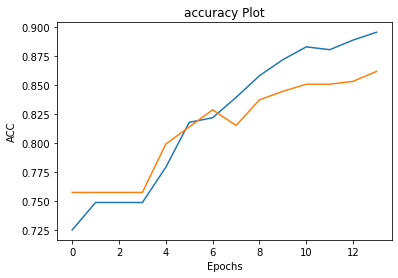

In [7]:
plot_accuracy(history.history)